<a href="https://colab.research.google.com/github/armandossrecife/my_validation/blob/main/My_Commits_and_my_Issues_from_Cassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos commits e issues do Cassandra

Análise dos issues e commits que possuem SATD Keywords e arquivos críticos (By ATDCodeAnalyzer)


## Dependências

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import tqdm
import scipy.stats as stats

## Funções

In [86]:
def show_pie(my_field, my_title):
  type_counts = my_df[my_field].value_counts().sort_values(ascending=False)
  type_percentages = type_counts / type_counts.sum() * 100

  plt.pie(type_percentages, labels=type_counts.index, autopct="%.1f%%")
  plt.title(my_title)
  plt.show()

def get_max_n_chars(text, max_n):
  """Returns the maximum n characters of the text.

  Args:
    text: A string containing the text.

  Returns:
    A string containing the maximum n characters of the text.
  """

  text_length = len(text)
  if text_length <= max_n:
    return text
  else:
    return text[:max_n]

def create_new_file(filename, dir_name, issue_type, summary, description, status, comments):
  try:
    print('Creating a new text file...')
    print(f'Create file {filename} in {dir_name}')
    filename = dir_name + '/' + filename

    if issue_type is None:
      issue_type = ''
    if summary is None:
      summary = ''
    if description is None:
      description = ''
    if status is None:
      status = ''
    if comments is None:
      comments = ''

    with open(filename, mode='w') as f_issue:
      f_issue.write(f'issue_type: {issue_type} \n')
      f_issue.write(f'summary: {summary} \n')
      f_issue.write(f'description: {get_max_n_chars(text=description, max_n=1000)} \n')
      f_issue.write(f'status: {status} \n')
      f_issue.write(f'comments: {get_max_n_chars(text=comments, max_n=4000)} \n')
    print(f'File {filename} created with success!')

  except Exception as ex:
    print(f'Erro: {str(ex)}')

import scipy.stats as stats

def calculate_sample_size(confidence_level, margin_of_error, population_proportion, population_size):
    # Calculate the Z-score for the given confidence level
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate the sample size formula
    sample_size = ((z_score**2) * population_proportion * (1 - population_proportion)) / (margin_of_error**2)

    # Adjust for finite population
    if population_size:
        sample_size = sample_size / (1 + ((sample_size - 1) / population_size))

    return int(sample_size)

## DataSet

In [78]:
df_issues_in_commits_with_satd_keywords = pd.read_excel('issues_in_commits_detailed_muitos_arquivos.xlsx')
df_commits_with_satd_keywords_with_critical_classes = pd.read_excel('commits_com_muitos_arquivos_moficiados.xlsx')

my_issues = df_issues_in_commits_with_satd_keywords.copy()
my_commits = df_commits_with_satd_keywords_with_critical_classes.copy()

## Issues

In [79]:
my_issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   296 non-null    int64 
 1   issue_key    296 non-null    object
 2   issue_type   296 non-null    object
 3   summary      296 non-null    object
 4   description  289 non-null    object
 5   status       296 non-null    object
 6   priority     296 non-null    object
 7   comments     296 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.6+ KB


In [80]:
my_issues.head(5)

,Unnamed: 0,issue_key,issue_type,summary,description,status,priority,comments
0,0,CASSANDRA-185,New Feature,user-defined column ordering,name ordering by ascii String order isn't gene...,Resolved,Normal,we need byte[] column names to make this usefu...
1,1,CASSANDRA-139,Improvement,thrift API should use lists instead of colon-d...,NaN,Resolved,Low,This currently makes it impossible to serializ...
2,2,CASSANDRA-111,Bug,Mixed line endings in the codebase,There seems to be a lot of line endings in the...,Resolved,Normal,This is the patch file to remove the DOS line ...
3,3,CASSANDRA-65,Improvement,Support for non-hash based partitioners,NaN,Resolved,Normal,5 r/m StorageService.token in favor of expl...
4,4,CASSANDRA-47,New Feature,SSTable compression,We should be able to do SSTable compression wh...,Resolved,Normal,Are you wanting compression just for the data ...


### Pie charts

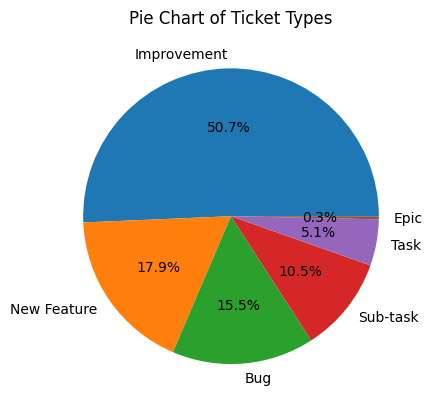

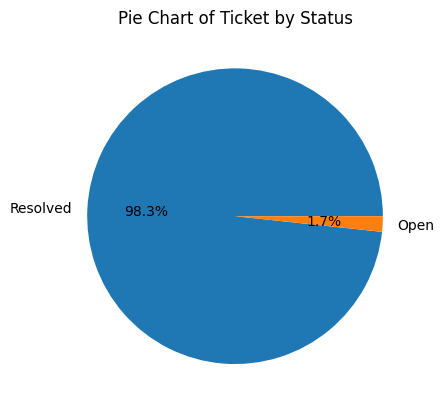

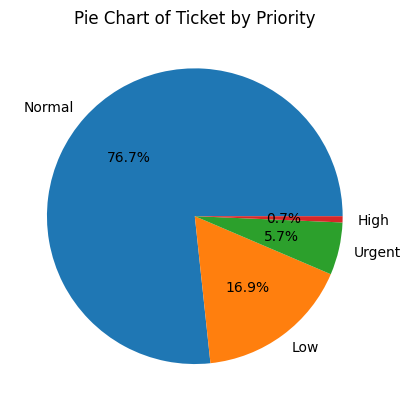

In [84]:
show_pie(my_field='issue_type', my_title="Pie Chart of Ticket Types")
show_pie(my_field='status', my_title="Pie Chart of Ticket by Status")
show_pie(my_field='priority', my_title="Pie Chart of Ticket by Priority")

### Find Out The Sample Size

This calculator computes the minimum number of necessary samples to meet the desired statistical constraints.

In [87]:
confidence_level = 0.95
margin_of_error = 0.05
population_proportion = 0.5
population_size = 300

sample_size = calculate_sample_size(confidence_level, margin_of_error, population_proportion, population_size)
print(f"Required sample size: {sample_size}")

Required sample size: 168


In [71]:
list_issue_key = my_issues.issue_key
sample_169_issues = random.choices(list_issue_key, k=169)
print(len(sample_169_issues))

169


In [89]:
print(sample_169_issues)

['CASSANDRA-1555', 'CASSANDRA-12229', 'CASSANDRA-18071', 'CASSANDRA-1608', 'CASSANDRA-16850', 'CASSANDRA-2069', 'CASSANDRA-6689', 'CASSANDRA-13304', 'CASSANDRA-7248', 'CASSANDRA-16925', 'CASSANDRA-18554', 'CASSANDRA-17390', 'CASSANDRA-15556', 'CASSANDRA-3647', 'CASSANDRA-9431', 'CASSANDRA-11115', 'CASSANDRA-7705', 'CASSANDRA-16092', 'CASSANDRA-6561', 'CASSANDRA-14566', 'CASSANDRA-15066', 'CASSANDRA-7066', 'CASSANDRA-9499', 'CASSANDRA-16923', 'CASSANDRA-16930', 'CASSANDRA-8143', 'CASSANDRA-12838', 'CASSANDRA-16213', 'CASSANDRA-8244', 'CASSANDRA-7544', 'CASSANDRA-3578', 'CASSANDRA-1501', 'CASSANDRA-1034', 'CASSANDRA-14935', 'CASSANDRA-1034', 'CASSANDRA-14821', 'CASSANDRA-18070', 'CASSANDRA-5149', 'CASSANDRA-5549', 'CASSANDRA-11213', 'CASSANDRA-5863', 'CASSANDRA-9459', 'CASSANDRA-6356', 'CASSANDRA-6253', 'CASSANDRA-3792', 'CASSANDRA-14793', 'CASSANDRA-3617', 'CASSANDRA-9160', 'CASSANDRA-111', 'CASSANDRA-9160', 'CASSANDRA-14939', 'CASSANDRA-13994', 'CASSANDRA-17931', 'CASSANDRA-8099', 'CAS

In [68]:
my_dir_name = 'my_issues'
total_of_issues = my_issues.shape[0]

for index in tqdm.tqdm(my_issues.index, total=total_of_issues, desc='Analyzing issues'):
  if my_issues.issue_key[index] in sample_169_issues:
    create_new_file(filename=my_issues.issue_key[index], dir_name=my_dir_name, issue_type=my_issues.issue_type[index], summary=my_issues.summary[index], description=my_issues.description[index], status=my_issues.status[index], comments=my_issues.comments[index])

Analyzing issues:  44%|████▍     | 131/296 [00:00<00:00, 1300.93it/s]

Creating a new text file...
Create file CASSANDRA-185 in my_issues
File my_issues/CASSANDRA-185 created with success!
Creating a new text file...
Create file CASSANDRA-139 in my_issues
Erro: object of type 'float' has no len()
Creating a new text file...
Create file CASSANDRA-111 in my_issues
File my_issues/CASSANDRA-111 created with success!
Creating a new text file...
Create file CASSANDRA-821 in my_issues
File my_issues/CASSANDRA-821 created with success!
Creating a new text file...
Create file CASSANDRA-767 in my_issues
File my_issues/CASSANDRA-767 created with success!
Creating a new text file...
Create file CASSANDRA-620 in my_issues
File my_issues/CASSANDRA-620 created with success!
Creating a new text file...
Create file CASSANDRA-1189 in my_issues
File my_issues/CASSANDRA-1189 created with success!
Creating a new text file...
Create file CASSANDRA-1034 in my_issues
File my_issues/CASSANDRA-1034 created with success!
Creating a new text file...
Create file CASSANDRA-994 in my_i

Analyzing issues: 100%|██████████| 296/296 [00:00<00:00, 1303.19it/s]

File my_issues/CASSANDRA-16896 created with success!
Creating a new text file...
Create file CASSANDRA-17390 in my_issues
File my_issues/CASSANDRA-17390 created with success!
Creating a new text file...
Create file CASSANDRA-18123 in my_issues
File my_issues/CASSANDRA-18123 created with success!
Creating a new text file...
Create file CASSANDRA-18062 in my_issues
File my_issues/CASSANDRA-18062 created with success!
Creating a new text file...
Create file CASSANDRA-17931 in my_issues
File my_issues/CASSANDRA-17931 created with success!
Creating a new text file...
Create file CASSANDRA-18441 in my_issues
File my_issues/CASSANDRA-18441 created with success!
Creating a new text file...
Create file CASSANDRA-18252 in my_issues
File my_issues/CASSANDRA-18252 created with success!
Creating a new text file...
Create file CASSANDRA-18134 in my_issues
File my_issues/CASSANDRA-18134 created with success!
Creating a new text file...
Create file CASSANDRA-18592 in my_issues
File my_issues/CASSANDRA

### Zip content

In [75]:
!zip -r my_issues.zip my_issues

  adding: my_issues/ (stored 0%)
  adding: my_issues/CASSANDRA-6809 (deflated 55%)
  adding: my_issues/CASSANDRA-9664 (deflated 54%)
  adding: my_issues/CASSANDRA-8671 (deflated 57%)
  adding: my_issues/CASSANDRA-111 (deflated 54%)
  adding: my_issues/CASSANDRA-8984 (deflated 52%)
  adding: my_issues/CASSANDRA-2897 (deflated 56%)
  adding: my_issues/CASSANDRA-1608 (deflated 56%)
  adding: my_issues/CASSANDRA-12151 (deflated 54%)
  adding: my_issues/CASSANDRA-5286 (deflated 54%)
  adding: my_issues/CASSANDRA-9143 (deflated 63%)
  adding: my_issues/CASSANDRA-3719 (deflated 48%)
  adding: my_issues/CASSANDRA-2319 (deflated 60%)
  adding: my_issues/CASSANDRA-16064 (deflated 47%)
  adding: my_issues/CASSANDRA-16217 (deflated 57%)
  adding: my_issues/CASSANDRA-9932 (deflated 59%)
  adding: my_issues/CASSANDRA-17044 (deflated 54%)
  adding: my_issues/CASSANDRA-5657 (deflated 12%)
  adding: my_issues/CASSANDRA-11580 (deflated 57%)
  adding: my_issues/CASSANDRA-16896 (deflated 50%)
  adding: my

## Commits

In [90]:
my_commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           288 non-null    int64 
 1   commits              288 non-null    object
 2   issues_ids           288 non-null    object
 3   data                 288 non-null    object
 4   msg                  288 non-null    object
 5   lines                288 non-null    int64 
 6   files                288 non-null    int64 
 7   critical_files       288 non-null    object
 8   keywords             288 non-null    object
 9   comments             288 non-null    object
 10  diff_commit          288 non-null    object
 11  modified_files       288 non-null    object
 12  dict_modified_files  288 non-null    object
dtypes: int64(3), object(10)
memory usage: 29.4+ KB


In [91]:
my_commits.head(3)

,Unnamed: 0,commits,issues_ids,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
0,0,907d92e21b8ce79e6a224933764e3b7215a94454,['CASSANDRA-65'],27/4/2009,replace BigInteger tokens with BigIntegerToken...,1090,31,"['ColumnFamilyStore.java', 'StorageService.java']","['files', 'test', 'TODO']",['\t \t //if( !isLoo...,"[{'ColumnFamilyStore.java': '@@ -43,6 +43,7 @@...","['ColumnFamilyStore.java', 'DBManager.java', '...","['@@ -43,6 +43,7 @@ import org.apache.log4j.Lo..."
1,26,f2da00fb0f2c92351b136ac13082b278c534c6ab,['CASSANDRA-139'],15/7/2009,thrift changes to remove : api.\nuse ColumnPat...,7987,65,"['DatabaseDescriptor.java', 'ColumnFamilyStore...","['API', 'TODO', 'TODO', 'TODO']","[' * Thrift API has changed a _lot_:', "" ...","[{'DatabaseDescriptor.java': '@@ -71,7 +71,7 @...","['CHANGES.txt', 'cassandra.thrift', 'BatchMuta...","['@@ -1,10 +1,14 @@\n 0.4 dev\n- * Added colum..."
2,27,986cee6806c5798c1c826d965ecadad0cfc70cc7,['CASSANDRA-185'],21/7/2009,change String column names to byte[] to allow ...,2582,84,"['DatabaseDescriptor.java', 'ColumnFamilyStore...","['TODO', 'confusing', 'TODO', 'TODO', 'fix']",[' // TODO duplicating data b/t tablemetada...,"[{'DatabaseDescriptor.java': '@@ -24,6 +24,9 @...","['storage-conf.xml', 'cassandra.thrift', 'Cass...","['@@ -49,13 +49,21 @@\n disab..."


### Describe statistics

In [92]:
round(my_commits.describe(), 2)

,Unnamed: 0,lines,files
count,288.00,288.00,288.00
mean,924.15,5112.86,76.09
std,387.78,11625.61,86.57
min,0.00,879.00,22.00
25%,636.75,1451.75,32.00
50%,945.00,2491.50,46.00
75%,1265.50,3881.75,71.00
max,1495.00,107283.00,645.00


<Axes: >

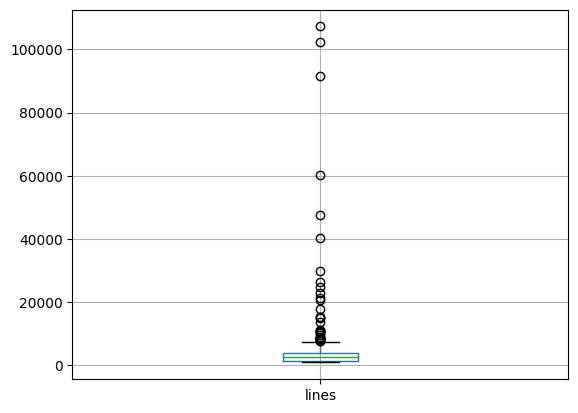

In [93]:
my_commits.boxplot(column='lines')

<Axes: >

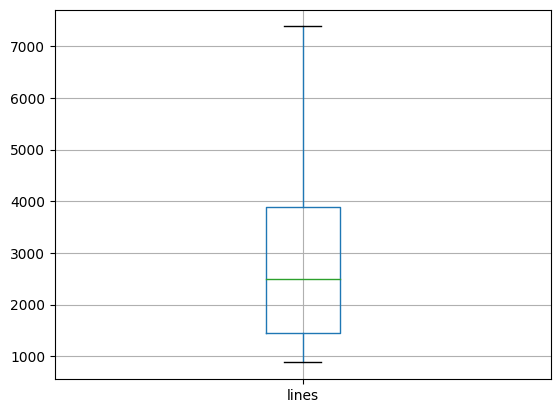

In [94]:
my_commits.boxplot(column='lines', showfliers=False)

<Axes: >

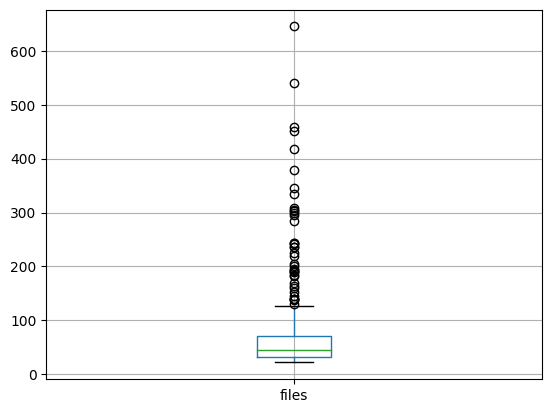

In [95]:
my_commits.boxplot(column='files')

<Axes: >

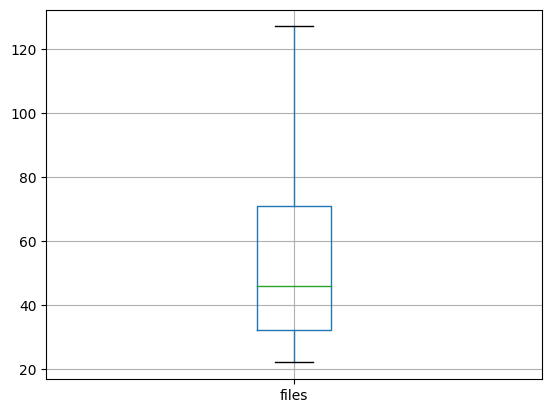

In [96]:
my_commits.boxplot(column='files', showfliers=False)

### Keywords

In [97]:
for each_list in my_commits.keywords:
  print(each_list)

['files', 'test', 'TODO']
['API', 'TODO', 'TODO', 'TODO']
['TODO', 'confusing', 'TODO', 'TODO', 'fix']
['implementation', 'implementation', 'exception', 'exception', 'exception', 'exception', 'exception', 'implementation', 'implementation', 'implementation', 'implementation', 'interface', 'documentation', 'interface', 'interface', 'implementation', 'interface', 'documentation', 'interface', 'fix', 'implementation', 'interface', 'implementation', 'throughput', 'throughput', 'TODO', 'confusing', 'implementation', 'TODO', 'fix', 'TODO', 'TODO', 'fix', 'TODO', 'files', 'files', 'files', 'files', 'files', 'files', 'files', 'ugly', 'files', 'files', 'rename', 'files', 'clean', 'update', 'update', 'files', 'files', 'files', 'files', 'files', 'files', 'files', 'files', 'files', 'clean', 'TODO', 'comment', 'files', 'files', 'exception', 'files', 'files', 'files', 'files', 'test', 'TODO', 'clean', 'files', 'exception', 'files', 'TODO', 'latency', 'test', 'test', 'output', 'fix', 'header', 'heade

### Critical Files

In [98]:
for each in my_commits.critical_files:
  print(each)

['ColumnFamilyStore.java', 'StorageService.java']
['DatabaseDescriptor.java', 'ColumnFamilyStore.java']
['DatabaseDescriptor.java', 'ColumnFamilyStore.java', 'SSTableReader.java', 'CassandraDaemon.java']
['DatabaseDescriptor.java', 'ColumnFamilyStore.java', 'SSTableReader.java', 'MessagingService.java', 'StorageProxy.java', 'StorageService.java']
['StorageService.java']
['DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'StorageService.java', 'NodeProbe.java']
['ColumnFamilyStore.java', 'CompactionManager.java', 'SSTableReader.java']
['ColumnFamilyStore.java', 'StorageProxy.java', 'StorageService.java', 'NodeProbe.java']
['DatabaseDescriptor.java', 'StorageProxy.java', 'StorageService.java', 'NodeProbe.java']
['DatabaseDescriptor.java', 'StorageService.java']
['ColumnFamilyStore.java', 'CompactionManager.java', 'SSTableReader.java', 'StorageProxy.java', 'StorageService.java', 'NodeProbe.java']
['StorageProxy.java', 'StorageService.java']
['DatabaseDescriptor.jav

### Modified_files

In [99]:
for each in my_commits.modified_files:
  print(each)

['ColumnFamilyStore.java', 'DBManager.java', 'FileStruct.java', 'SystemTable.java', 'BigIntegerToken.java', 'BootStrapper.java', 'IPartitioner.java', 'LeaveJoinProtocolHelper.java', 'LeaveJoinProtocolImpl.java', 'OrderPreservingHashPartitioner.java', 'OrderPreservingPartitioner.java', 'RandomPartitioner.java', 'Range.java', 'StringToken.java', 'Token.java', 'SSTable.java', 'AbstractStrategy.java', 'IReplicaPlacementStrategy.java', 'RackAwareStrategy.java', 'RackUnawareStrategy.java', 'TokenMetadata.java', 'StorageLoadBalancer.java', 'StorageService.java', 'StorageServiceMBean.java', 'TokenUpdateVerbHandler.java', 'MembershipCleanerVerbHandler.java', 'TokenUpdateVerbHandler.java', 'TokenUpdater.java', 'FastObjectHash.java', 'SystemTableTest.java', 'RangeTest.java']
['CHANGES.txt', 'cassandra.thrift', 'BatchMutation.java', 'BatchMutationSuper.java', 'Cassandra.java', 'Column.java', 'ColumnParent.java', 'ColumnPath.java', 'ColumnPathOrParent.java', 'CqlResult.java', 'CqlResult_t.java', 'I